## Proyecto Métodos Computacionales 2024-1

Cristian Alexis Gómez Jaramillo - 1001360613

In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation

# Estudio de un sistema de dos péndulos acoplados.

Un péndulo doble consiste de dos péndulos simples acoplados. El péndulo superior tiene masa $m_1$ y longitud $l_1$, mientras que el péndulo inferior tiene masa $m_2$ y longitud $l_2$. Ambos péndulos se mueven sobre el mismo plano vertical. Encuentre las ecuaciones de movimiento usando el formalismo de Lagrange, tomando como coordenadas generalizadas los ángulos $\theta_1$ y $\theta_2$.

![Esquema](esquema_pendulo.png)

### Lagrangiano.
Para esto, se utiliza el Lagrangiano de un sistema de partículas que se define como la diferencia entre su energía cinética $E_k$ y su energía potencial $E_p$.

\begin{equation}
\mathcal{L}=E_k-E_p
\end{equation}

Más generalmente, dado que el sistema de dos péndulos acoplados está únicamente siendo afectado por fuerzas de un campo conservativo, la trayectoria puede ser encontrada mediante las ecuaciones de Euler-Lagrange aplicadas al lagrangiano. Para un sistema discreto de partículas,

\begin{equation}
\mathcal{L}(x_i,y_i,\dot{x_i},\dot{y_i})=\sum_{i=1}^{n}\left[\frac{m_i}{2}(\dot{x_i}^2+\dot{y_i}^2)-V(x_i,y_i)\right]
\end{equation}

Para un sistema de dos coordenadas, donde $V(x,y)$ en este contexto sería la función potencial para el caso del campo gravitacional $E_p(y)=mgy$. De esta manera y con el sistema anteriormente mencionado tenemos que

\begin{equation}
x_1=l_1 sen\theta_1
\end{equation}

\begin{equation}
y_1=-l_1 cos\theta_1
\end{equation}

\begin{equation}
x_2=l_1 sen\theta_1+ l_2sen\theta_2
\end{equation}


\begin{equation}
y_2=-l_1 cos\theta_1 -
 l_2 cos\theta_2
\end{equation}

Derivando estas expresiones respecto al tiempo se tiene

\begin{equation}
\dot{x_1}=l_1 \dot{\theta_1}cos\theta_1
\end{equation}

\begin{equation}
\dot{y_1}=l_1 \dot{\theta_1} sen\theta_1
\end{equation}

\begin{equation}
\dot{x_2}=l_1 \dot{\theta_1}cos\theta_1 + l_2 \dot{\theta_2}cos\theta_2
\end{equation}


\begin{equation}
\dot{y_2}=l_1 \dot{\theta_1}sen\theta_1 + l_2 \dot{\theta_2}sen\theta_2
\end{equation}

De este modo, el Lagrangiano para las dos masas pendulares es:

In [3]:
m_1,m_2,l_1,l_2,g,t,ome1,ome2=sp.symbols('m_1,m_2,l_1,l_2,g,t,omega_1,omega_2')

theta1,theta2,L1,L2,w1,w2=sp.symbols('θ_1,θ_2,L_1,L_2,omega_1,omega_2',cls=sp.Function)
theta1=theta1(t)
theta2=theta2(t)
w1=w1(t)
w2=w2(t)

x1=l_1*sp.sin(theta1)
x2=x1+l_2*sp.sin(theta2)

x1p=sp.diff(x1,t)
x2p=sp.diff(x2,t)

y1=-l_1*sp.cos(theta1)
y2=y1-l_2*sp.cos(theta2)

y1p=sp.diff(y1,t)
y2p=sp.diff(y2,t)

L1=m_1/2 * (x1p**2+y1p**2) - m_1*g*y1           #lagrangianos por separado
L2=m_2/2 * (x2p**2+y2p**2) - m_2*g*y2

L=L1+L2
print('Lagrangiano para el sistema de dos péndulos:')
L.simplify()

Lagrangiano para el sistema de dos péndulos:


g*l_1*m_1*cos(θ_1(t)) + g*m_2*(l_1*cos(θ_1(t)) + l_2*cos(θ_2(t))) + l_1**2*m_1*Derivative(θ_1(t), t)**2/2 + m_2*(l_1**2*Derivative(θ_1(t), t)**2 + 2*l_1*l_2*cos(θ_1(t) - θ_2(t))*Derivative(θ_1(t), t)*Derivative(θ_2(t), t) + l_2**2*Derivative(θ_2(t), t)**2)/2

### Ecuación de *Euler-Lagrange*.

Una vez obtenido el Lagrangiano del sistema, queremos ahora hallar las trayectorias variantes en el tiempo para cada masa del péndulo. Para ello, hacemos uso de la ecuacion de *Euler-Lagrange* respecto a unas coordenadas generalizadas $q_i=\{q_1,q_2,...,q_i\}$.

\begin{equation}
\frac{d}{dt}\frac{\partial \mathcal{L}}{\partial \dot{q_i}}-\frac{\partial \mathcal{L}}{\partial q_i}=0
\end{equation}

Donde en nuestro caso las coordenadas generalizadas son $q_i=\{\theta_1,\theta_2\}$, por lo tanto, para $\theta_1$:

In [4]:
dL_dtheta1=sp.diff(L,theta1).simplify()
dL_dtheta1p=sp.diff(L,sp.diff(theta1,t)).simplify()

eu_lag1=sp.diff(dL_dtheta1p,t)-dL_dtheta1
print('Ecuación de Euler-Lagrange para θ1:')
ec1=eu_lag1.simplify()
ec1

Ecuación de Euler-Lagrange para θ1:


l_1*(g*m_1*sin(θ_1(t)) + g*m_2*sin(θ_1(t)) + l_1*m_1*Derivative(θ_1(t), (t, 2)) + l_1*m_2*Derivative(θ_1(t), (t, 2)) + l_2*m_2*sin(θ_1(t) - θ_2(t))*Derivative(θ_2(t), t)**2 + l_2*m_2*cos(θ_1(t) - θ_2(t))*Derivative(θ_2(t), (t, 2)))

Y para $\theta_2$:

In [5]:
dL_dtheta2=sp.diff(L,theta2).simplify()
dL_dtheta2p=sp.diff(L,sp.diff(theta2,t)).simplify()

eu_lag2=sp.diff(dL_dtheta2p,t)-dL_dtheta2
print('Ecuación de Euler-Lagrange para θ2:')
ec2=eu_lag2.simplify()
ec2

Ecuación de Euler-Lagrange para θ2:


l_2*m_2*(g*sin(θ_2(t)) - l_1*sin(θ_1(t) - θ_2(t))*Derivative(θ_1(t), t)**2 + l_1*cos(θ_1(t) - θ_2(t))*Derivative(θ_1(t), (t, 2)) + l_2*Derivative(θ_2(t), (t, 2)))

De modo que obtenemos un sistema de ecuaciones diferenciales de dos ecuaciones con incógnitas $\theta_1$ y $\theta_2$.

\begin{cases}
\displaystyle l_{1} \left(g m_{1} \sin{\left(θ_{1}{\left(t \right)} \right)} + g m_{2} \sin{\left(θ_{1}{\left(t \right)} \right)} + l_{1} m_{1} \frac{d^{2}}{d t^{2}} θ_{1}{\left(t \right)} + l_{1} m_{2} \frac{d^{2}}{d t^{2}} θ_{1}{\left(t \right)} + l_{2} m_{2} \sin{\left(θ_{1}{\left(t \right)} - θ_{2}{\left(t \right)} \right)} \left(\frac{d}{d t} θ_{2}{\left(t \right)}\right)^{2} + l_{2} m_{2} \cos{\left(θ_{1}{\left(t \right)} - θ_{2}{\left(t \right)} \right)} \frac{d^{2}}{d t^{2}} θ_{2}{\left(t \right)}\right)=0 \\
\displaystyle l_{2} m_{2} \left(g \sin{\left(θ_{2}{\left(t \right)} \right)} - l_{1} \sin{\left(θ_{1}{\left(t \right)} - θ_{2}{\left(t \right)} \right)} \left(\frac{d}{d t} θ_{1}{\left(t \right)}\right)^{2} + l_{1} \cos{\left(θ_{1}{\left(t \right)} - θ_{2}{\left(t \right)} \right)} \frac{d^{2}}{d t^{2}} θ_{1}{\left(t \right)} + l_{2} \frac{d^{2}}{d t^{2}} θ_{2}{\left(t \right)}\right)=0
\end{cases}


## Método de solución

Para darle solución a este sistema de ecuaciones diferenciales debemos despejar las variables $\ddot{\theta_1}$ y $\ddot{\theta_2}$ del sistema de ecuaciones diferenciales anterior. De esta manera,

In [6]:
ecua1=sp.Eq(ec1,0)
ecua2=sp.Eq(ec2,0)

Ecuación para $\ddot{\theta_1}$:

In [7]:
sol1=sp.solve(ecua1,sp.diff(theta1,t,2))
sp.Eq(sp.diff(theta1,t,2),sol1[0])

Eq(Derivative(θ_1(t), (t, 2)), -(g*m_1*sin(θ_1(t)) + g*m_2*sin(θ_1(t)) + l_2*m_2*sin(θ_1(t) - θ_2(t))*Derivative(θ_2(t), t)**2 + l_2*m_2*cos(θ_1(t) - θ_2(t))*Derivative(θ_2(t), (t, 2)))/(l_1*(m_1 + m_2)))

Ecuación para $\ddot{\theta_2}$:

In [8]:
sol2=sp.solve(ecua2,sp.diff(theta2,t,2))
sp.Eq(sp.diff(theta2,t,2),sol2[0])

Eq(Derivative(θ_2(t), (t, 2)), (-g*sin(θ_2(t)) + l_1*sin(θ_1(t) - θ_2(t))*Derivative(θ_1(t), t)**2 - l_1*cos(θ_1(t) - θ_2(t))*Derivative(θ_1(t), (t, 2)))/l_2)

Luego, para utilizar los métodos vistos en clase debemos hacer la sustitución $\frac{d}{dt}\theta_1(t)=\omega_1(t)$ y $\frac{d}{dt}\theta_2(t)=\omega_2(t)$, convirtiéndose en 4 ecuaciones con 4 incógnitas.

In [9]:
sp.Eq(sp.diff(w1,t),sol1[0].subs(sp.diff(theta2,t),ome2))

Eq(Derivative(omega_1(t), t), -(g*m_1*sin(θ_1(t)) + g*m_2*sin(θ_1(t)) + l_2*m_2*omega_2**2*sin(θ_1(t) - θ_2(t)) + l_2*m_2*cos(θ_1(t) - θ_2(t))*Derivative(omega_2, t))/(l_1*(m_1 + m_2)))

In [10]:
sp.Eq(sp.diff(w2,t),sol2[0].subs(sp.diff(theta1,t),ome1))

Eq(Derivative(omega_2(t), t), (-g*sin(θ_2(t)) + l_1*omega_1**2*sin(θ_1(t) - θ_2(t)) - l_1*cos(θ_1(t) - θ_2(t))*Derivative(omega_1, t))/l_2)

Dando lugar así, a los siguientes dos sistemas acoplados.

\begin{cases}

\frac{d}{dt}\theta_1(t)=\omega_1(t) \\

\displaystyle \frac{d}{d t} \omega_{1}{\left(t \right)} = - \frac{g m_{1} \sin{\left(θ_{1}{\left(t \right)} \right)} + g m_{2} \sin{\left(θ_{1}{\left(t \right)} \right)} + l_{2} m_{2} \omega_{2}^{2} \sin{\left(θ_{1}{\left(t \right)} - θ_{2}{\left(t \right)} \right)} + l_{2} m_{2} \cos{\left(θ_{1}{\left(t \right)} - θ_{2}{\left(t \right)} \right)} \frac{d}{d t} \omega_{2}}{l_{1} \left(m_{1} + m_{2}\right)}

\end{cases}

\begin{cases}

\frac{d}{dt}\theta_2(t)=\omega_2(t) \\

\displaystyle \frac{d}{d t} \omega_{2}{\left(t \right)} = \frac{- g \sin{\left(θ_{2}{\left(t \right)} \right)} + l_{1} \omega_{1}^{2} \sin{\left(θ_{1}{\left(t \right)} - θ_{2}{\left(t \right)} \right)} - l_{1} \cos{\left(θ_{1}{\left(t \right)} - θ_{2}{\left(t \right)} \right)} \frac{d}{d t} \omega_{1}}{l_{2}}

\end{cases}

Para el sistema:

### Caballito de batalla

In [79]:
def fun(u,t,params):
    g=params[0]
    l1=params[1]
    l2=params[2]
    m1=params[3]
    m2=params[4]

    θ1=u[0]
    w1=u[2]
    θ2=u[1]
    w2=u[3]

    dθ1dt=w1
    dθ2dt=w2

    dw1dt=0
    dw2dt=0

    for _ in range(100):            #este ciclo es así porque en cada una de las ecuaciones hay una variable que depende de otro que está en la otra ecuación. 
        dw1dt=-(g*m1*np.sin(θ1) + g*m2*np.sin(θ1) + l2*m2*w2**2*np.sin(θ1-θ2) + l2*m2*np.cos(θ1-θ2)*dw2dt)/(l1*(m1+m2))
        dw2dt=(-g*np.sin(θ2) + l1*w1**2*np.sin(θ1-θ2) - l1*np.cos(θ1-θ2)*dw1dt)/l2

    dudt=np.array([dθ1dt,dθ2dt,dw1dt,dw2dt])

    return dudt

### Parámetros y condiciones iniciales

#### Análisis de casos específicos

Una vez dada la solución al sistema de ecuaciones diferenciales, podemos centrarnos en estudiar qué pasa con el comportamiento del péndulo dados ciertos parámetros y condiciones iniciales, en específico se estudiarán estos 3:

1. $m_2\gg m_1; \theta_{01}=\theta_{02}=\frac{\pi}{2}; \omega_{01}=\omega_{02}=0$

2. $m_1=m_2;$ $\theta_{01},\theta_{02}\approx \theta_{01}',\theta_{02}'$; $\omega_{01}=\omega_{02}$

3. $m_1=m_2;$ $\omega_{01},\omega_{02}\approx \omega_{01}',\omega_{02}'$; $\theta_{01}=\theta_{02}$

# Solución al sistema con Odeint

In [80]:
ta=0
tb=15
dt=0.01

n=int((tb-ta)/dt)
t=np.linspace(ta,tb,n)

def solve(ta,tb,dt,u0,params):
    n=int((tb-ta)/dt)
    t=np.linspace(ta,tb,n)

    sol=odeint(fun,u0,t,args=(params,))

    θ1=sol[:,0]
    θ2=sol[:,1]
    w1=sol[:,2]
    w2=sol[:,3]

    #Cambio a coordenadas cartesianas
    x1=l1*np.sin(θ1)
    y1=-l1*np.cos(θ1)
    x2=x1+l2*np.sin(θ2)
    y2=y1-l2*np.cos(θ2)

    return θ1,θ2,w1,w2,x1,y1,x2,y2

# Funciones para graficar

### Animación

In [81]:
def mamotreto(t,θ1,θ2,w1,w2,x1,y1,x2,y2):
    fig=plt.figure(figsize=(12,9))
    #============================================================
    #                           Péndulo
    #============================================================
    axes1=plt.subplot2grid((4,4),(0,0),colspan=2,rowspan=2)
    axes1.set_title(f'Péndulo doble $θ₀₁={s1},θ₀₂={s2},\omega₀₁={w10},\omega₀₂={w20}$')
    axes1.set_xlabel('x[m]')
    axes1.set_ylabel('y[m]')
    axes1.set_xlim(np.min(x2)-1,np.max(x2)+1)
    axes1.set_ylim(np.min(y2)-1,np.max(y2)+1)
    axes1.set_aspect('equal','box')
    
    dot1,=axes1.plot([],[],'o', markersize=5,color='black')  #m1
    dot2,=axes1.plot([],[],'o', markersize=5,color='black')  #m2  
    
    trace1,=axes1.plot([],[],'r-',label='Recorrido $m_1$')      #recorrido m1
    trace2,=axes1.plot([],[],'b-',label='Recorrido $m_2$')      #recorrido m2
    
    palos,=axes1.plot([],[],'o-',color='black')                 #cuerda de los péndulos
    axes1.legend()
    axes1.grid()
    #============================================================
    #                       Posición angular
    #============================================================
    axes2=plt.subplot2grid((4,4),(0,2),colspan=3,rowspan=2)
    axes2.set_title('Posición angular')
    axes2.set_xlabel('t[s]')
    axes2.set_ylabel('$θ(t)$[rad]')
    axes2.set_xlim(np.min(t),np.max(t))
    axes2.set_ylim(np.min([θ1,θ2])-2,np.max([θ1,θ2])+2)
    
    lθ1,=axes2.plot([],[],'r-',label='$θ_1(t)$')
    lθ2,=axes2.plot([],[],'b-',label='$θ_2(t)$')
    axes2.legend()
    axes2.grid()
    #============================================================
    #                       Velocidad angular
    #============================================================
    axes3=plt.subplot2grid((4,4),(2,2),colspan=3,rowspan=2)
    axes3.set_title('Velocidad angular')
    axes3.set_xlabel('t[s]')
    axes3.set_ylabel('$\omega(t)$[rad/s]')
    axes3.set_xlim(np.min(t),np.max(t))
    axes3.set_ylim(np.min([w1,w2])-2,np.max([w1,w2])+2)
    
    lw1,=axes3.plot([],[],'r-',label='$\omega_1(t)$')
    lw2,=axes3.plot([],[],'b-',label='$\omega_2(t)$')
    axes3.legend()
    axes3.grid()
    #============================================================
    #                       Espacio de fases
    #============================================================
    axes4=plt.subplot2grid((4,4),(2,0),colspan=2,rowspan=2)
    axes4.set_title('Espacio de fases')
    axes4.set_xlabel('$\omega(t)$[rad/s]')
    axes4.set_ylabel('θ(t)$[rad/s]')
    axes4.set_ylim(np.min([w1,w2])-2,np.max([w1,w2])+2)
    axes4.set_xlim(np.min([θ1,θ2])-2,np.max([θ1,θ2])+2)
    
    lf1,=axes4.plot([],[],'r-',label='$θ_1(\omega_1)$')
    lf2,=axes4.plot([],[],'b-',label='$θ_2(\omega_2)$')
    axes4.legend()
    axes4.grid()
    #============================================================
    def init():
        dot1.set_data([],[])
        dot2.set_data([],[])
    
        trace1.set_data([],[])
        trace2.set_data([],[])
    
        lθ1.set_data([],[])
        lθ2.set_data([],[])
    
        lw1.set_data([],[])
        lw2.set_data([],[])
    
        lf1.set_data([],[])
        lf2.set_data([],[])
    
        return dot1,dot2,trace1,trace2,lθ1,lθ2,lw1,lw2,lf1,lf2,
    
    def animate(i):
        px=[0,x1[i],x2[i]]
        py=[0,y1[i],y2[i]]
        palos.set_data(px,py)
    
        dot1.set_data([x1[i]],[y1[i]])
        dot2.set_data([x2[i]],[y2[i]])
    
        trace1.set_data(x1[:i],y1[:i])
        trace2.set_data(x2[:i],y2[:i])
    
        lθ1.set_data(t[:i],θ1[:i])
        lθ2.set_data(t[:i],θ2[:i])
    
        lw1.set_data(t[:i],w1[:i])
        lw2.set_data(t[:i],w2[:i])
    
        lf1.set_data(θ1[:i],w1[:i])
        lf2.set_data(θ2[:i],w2[:i])
    
        return dot1,dot2,trace1,trace2,palos,lθ1,lθ2,lw1,lw2,lf1,lf2,
    
    ani=FuncAnimation(fig,animate,frames=len(t),init_func=init,blit=True,interval=1)
    ani
    plt.tight_layout()

### Plots

In [82]:
def graph(t,θ1,θ2,w1,w2,x1,y1,x2,y2):
    plt.figure(figsize=(12,9))

    ax1=plt.subplot2grid((4,4),(0,0),colspan=2,rowspan=2)
    ax1.plot(x1,y1,label='Masa 1')
    ax1.plot(x2,y2,label='Masa 2')
    ax1.set_title(f'Péndulo doble $θ₀₁={s1},θ₀₂={s2},\omega₀₁={w10},\omega₀₂={w20}$')
    ax1.set_xlabel('x[m]')
    ax1.set_ylabel('y[m]')
    ax1.set_xlim(np.min(x2)-1,np.max(x2)+1)
    ax1.set_ylim(np.min(y2)-1,np.max(y2)+1)
    ax1.set_aspect('equal','box')
    ax1.grid()
    ax1.legend()

    ax2=plt.subplot2grid((4,4),(0,2),colspan=2,rowspan=1)
    ax2.plot(t,w1,label='$\omega_1(t)$')
    ax2.plot(t,w2,label='$\omega_2(t)$')
    ax2.set_title('Velocidad angular')
    ax2.set_xlabel('t[s]')
    ax2.set_ylabel('$\omega(t)$[rad/s]')
    ax2.grid()
    ax2.legend()

    ax3=plt.subplot2grid((4,4),(1,2),colspan=2,rowspan=1)
    ax3.plot(t,θ1,label='$θ_1(t)$')
    ax3.plot(t,θ2,label='$θ_2(t)$')
    ax3.set_title('Posición angular')
    ax3.set_xlabel('t[s]')
    ax3.set_ylabel('θ(t)[rad]')
    ax3.grid()
    ax3.legend()

    plt.tight_layout()

In [83]:
def graph_error(t,θ1,θ2,w1,w2):
    plt.figure(figsize=(12,9))
    
    ax1=plt.subplot2grid((4,4),(0,2),colspan=2,rowspan=1)
    ax1.plot(t,w1,label='$\omega_1(t)$ vs $\omega_1´(t)$')
    ax1.plot(t,w2,label='$\omega_2(t)$ vs $\omega_2´(t)$')
    ax1.set_title('Error: Velocidad angular')
    ax1.set_xlabel('t[s]')
    ax1.set_ylabel('$\omega(t)$[rad/s]')
    ax1.grid()
    ax1.legend()

    ax2=plt.subplot2grid((4,4),(1,2),colspan=2,rowspan=1)
    ax2.plot(t,θ1,label='$θ_1(t)$ vs $θ_1´(t)$')
    ax2.plot(t,θ2,label='$θ_2(t)$ vs $θ_2´(t)$')
    ax2.set_title('Error: Posición angular')
    ax2.set_xlabel('t[s]')
    ax2.set_ylabel('θ(t)[rad]')
    ax2.grid()
    ax2.legend()

    plt.tight_layout()

# Plots por casos

## Caso 1

In [84]:
l1,l2=1.,1.
g=9.81
m1=0.0001
m2=1000.

params=(g,l1,l2,m1,m2)

θ10=np.pi/2
s1=sp.pi/2          #poner este igual que el otro, es usado simplemente para printear pi en los plots y que no salga el decimal largo
w10=0

θ20=np.pi/2
s2=sp.pi/2          #poner este igual que el otro, es usado simplemente para printear pi en los plots y que no salga el decimal largo
w20=0

u0=np.array([θ10,θ20,w10,w20])

θ1,θ2,w1,w2,x1,y1,x2,y2=solve(ta,tb,dt,u0,params)

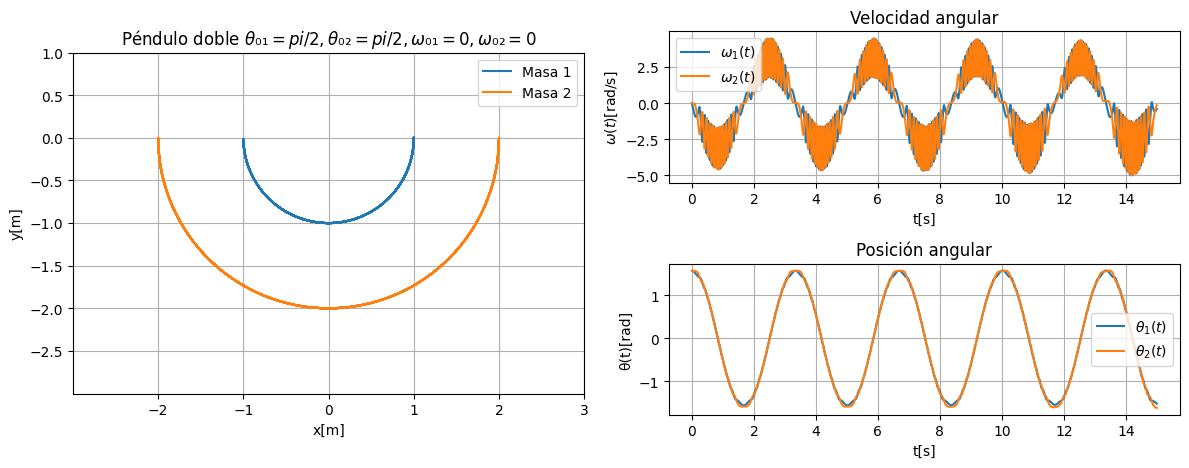

In [85]:
%matplotlib inline
graph(t,θ1,θ2,w1,w2,x1,y1,x2,y2)

## Caso 2

In [86]:
l1,l2=1.,1.
g=9.81
m1=1.
m2=1.

params=(g,l1,l2,m1,m2)

θ10=np.pi/2
θ10_=np.pi/2+0.01
s1=sp.pi/2+0.01          #poner este igual que el otro, es usado simplemente para printear pi en los plots y que no salga el decimal largo
w10=0

θ20=np.pi/2
θ20_=np.pi/2+0.01
s2=sp.pi/2+0.01          #poner este igual que el otro, es usado simplemente para printear pi en los plots y que no salga el decimal largo
w20=0

u0=np.array([θ10,θ20,w10,w20])
u0_=np.array([θ10_,θ20_,w10,w20])

θ1,θ2,w1,w2,x1,y1,x2,y2=solve(ta,tb,dt,u0,params)
θ1_,θ2_,w1_,w2_,x1_,y1_,x2_,y2_=solve(ta,tb,dt,u0_,params)

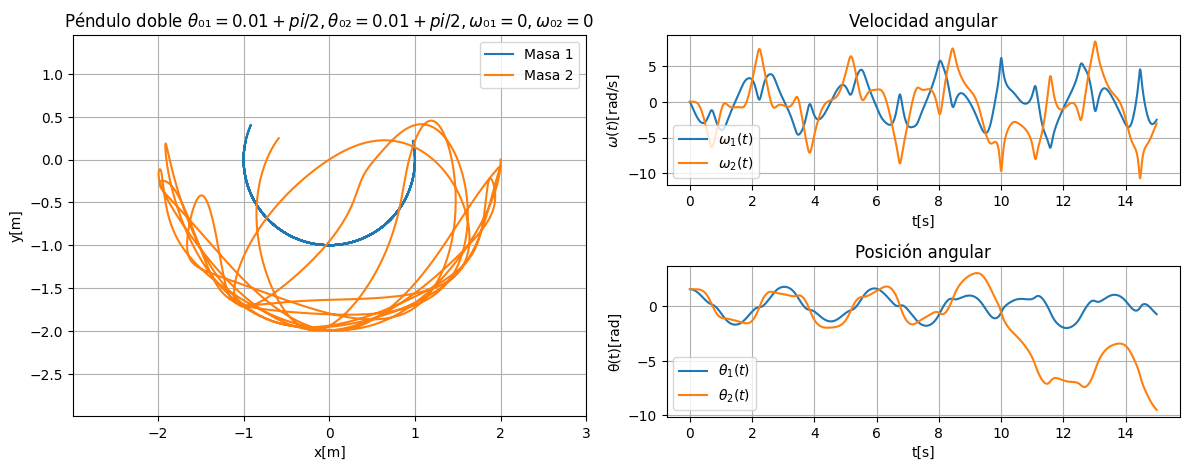

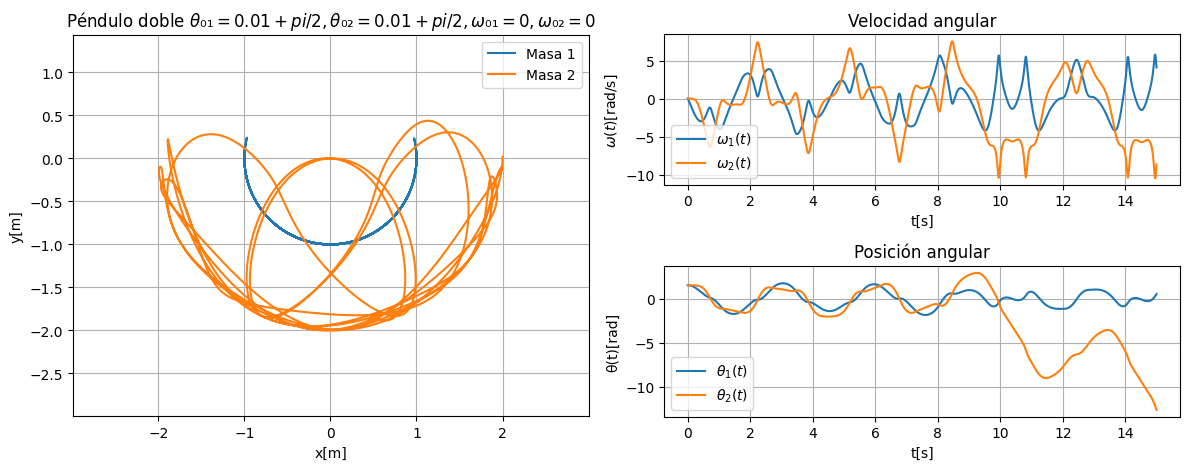

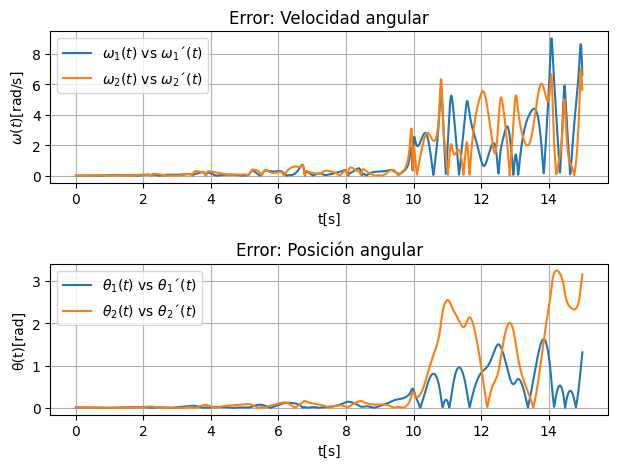

In [87]:
graph(t,θ1,θ2,w1,w2,x1,y1,x2,y2)
graph(t,θ1_,θ2_,w1_,w2_,x1_,y1_,x2_,y2_)
graph_error(t,np.abs(θ1-θ1_),np.abs(θ2-θ2_),np.abs(w1-w1_),np.abs(w2-w2_))

## Caso 3

In [88]:
#caso 3
l1,l2=1.,1.
g=9.81
m1=1.
m2=1.

params=(g,l1,l2,m1,m2)

θ10=np.pi/2
s1=sp.pi/2          #poner este igual que el otro, es usado simplemente para printear pi en los plots y que no salga el decimal largo
w10=0
w10_=0+0.01

θ20=np.pi/2
s2=sp.pi/2          #poner este igual que el otro, es usado simplemente para printear pi en los plots y que no salga el decimal largo
w20=0
w20_=0+0.01

u0=np.array([θ10,θ20,w10,w20])
u0_=np.array([θ10,θ20,w10_,w20_])

θ1,θ2,w1,w2,x1,y1,x2,y2=solve(ta,tb,dt,u0,params)
θ1_,θ2_,w1_,w2_,x1_,y1_,x2_,y2_=solve(ta,tb,dt,u0_,params)

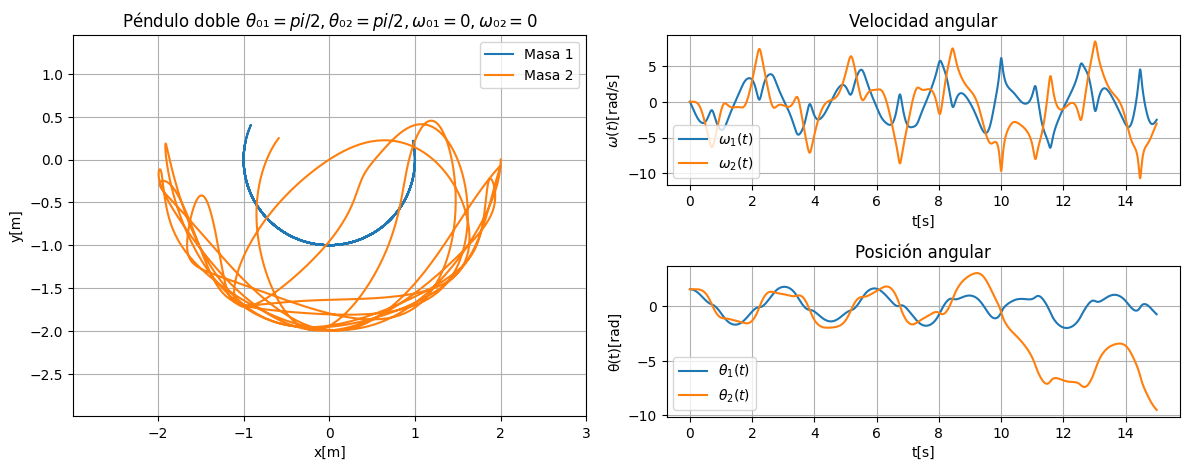

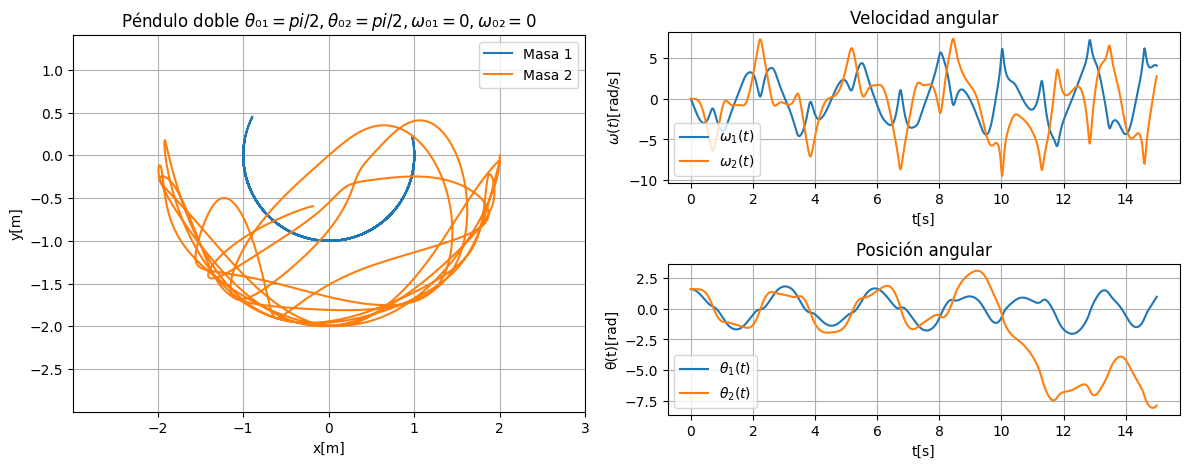

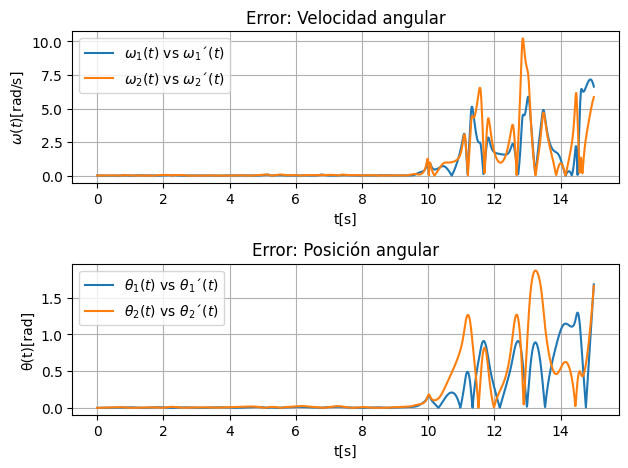

In [89]:
graph(t,θ1,θ2,w1,w2,x1,y1,x2,y2)
graph(t,θ1_,θ2_,w1_,w2_,x1_,y1_,x2_,y2_)
graph_error(t,np.abs(θ1-θ1_),np.abs(θ2-θ2_),np.abs(w1-w1_),np.abs(w2-w2_))

# Conclusiones

Para el caso 1 en el que la masa 2 es mucho más grande que la masa 1 podemos observar una notable similitud con el péndulo simple, aunque no del todo. Sin embargo, el péndulo con estas condiciones sí es casi idéntico al péndulo simple tanto en movimiento (x e y) como con la posición angular, por otro lado, la velocidad angular tiene cierta peculiardad y es que debido al lo excesivo de la masa provoca oscilaciones bruscas casi imperceptibles al ojo, por lo que se presentan fluctuaciones rápidas en esa velocidad.

Para el caso 2 y 3 en el que se analizan dos péndulos en simultáneo con las condiciones asociadas a la posición inicial, y velocidad angular respectivamente muy similares se observó que el movimiento al principio de la simulación es bastante parecido aunque sí hay ciertas diferencias minúsculas. Lo interesante viene cuando pasados aproximadamente 10 segundos de simulación ambos péndulos siguen caminos ya totalmente distintos y los errores respectivos comienzan a fluctuar de manera descontrolada.

Es interesante además, que dado condiciones iniciales en la posición y la velocidad similares independientemente, ambas simulaciones se bifurquen en un tiempo relativamente parecido.

# Animación final

In [90]:
%matplotlib qt
mamotreto(t,θ1,θ2,w1,w2,x1,y1,x2,y2)        #Mostrar animación